In [1]:
import os

# 라이브러리 import
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

from langchain_teddynote.models import MultiModal
from langchain_teddynote.messages import stream_response

from paddleocr import PaddleOCR, draw_ocr
from datetime import datetime

from paddleocr import __version__
print(f"PaddleOCR Version: {__version__}")

from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

PaddleOCR Version: 2.9.1


In [8]:
ocr = PaddleOCR(
    use_angle_cls=True,
    # use_angle_cls=False,
    lang='korean',  # 사용할 언어 설정
    use_gpu=False,  # GPU 사용 여부
    det_model_dir="./ch_PP-OCRv4_det_infer",  # 텍스트 감지 모델 경로
    rec_model_dir="./korean_PP-OCRv3_rec_infer"   # 텍스트 인식 모델 경로
)

[2024/11/18 14:30:09] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='./ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='./korean_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='c:\\Users\\ghckd\\anaconda3\\envs

In [9]:
# 영수증 이미지 경로
image_path = '../sample-data/blue_receipt1.jpg'  # 영수증 이미지 파일 경로

# 이미지 경로 확인 및 읽기
if not os.path.exists(image_path):
    print(f"Error: File not found at {image_path}")
    exit()

In [10]:
# 1. 이미지 로드
image = cv2.imread(image_path)
if image is None:
    print(f"Error: Unable to read the image file at {image_path}")
    exit()

In [11]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR로 로드하므로 RGB로 변환

In [12]:
# 2. OCR 추론 실행
ocr_result = ocr.ocr(image, cls=True)
# ocr_result = ocr.ocr(processed_image, cls=True)

[2024/11/18 14:30:19] ppocr DEBUG: dt_boxes num : 50, elapsed : 0.7186388969421387
[2024/11/18 14:30:19] ppocr DEBUG: cls num  : 50, elapsed : 0.8024654388427734
[2024/11/18 14:30:52] ppocr DEBUG: rec_res num  : 50, elapsed : 33.07403612136841


In [13]:
# 3. 텍스트 추출 및 출력
print("Extracted Texts:")
for line in ocr_result[0]:
    text, confidence = line[1]
    print(f"Text: {text}, Confidence: {confidence:.2f}")

Extracted Texts:
Text: 영수증, Confidence: 0.99
Text: 5, Confidence: 0.65
Text: 용산아이파크몰, Confidence: 0.94
Text: 인, Confidence: 0.94
Text: 6승, Confidence: 0.92
Text: 문82문호, Confidence: 0.68
Text: 동산구, Confidence: 0.79
Text: 1544-1122, Confidence: 1.00
Text: 서점, Confidence: 0.65
Text: 강로3가, Confidence: 1.00
Text: 104-81-45590, Confidence: 1.00
Text: 2018-01-07, Confidence: 1.00
Text: 호남, Confidence: 0.84
Text: 본, Confidence: 0.51
Text: Y므, Confidence: 0.80
Text: 수당, Confidence: 0.84
Text: 단가, Confidence: 0.97
Text: 6000, Confidence: 1.00
Text: 6000, Confidence: 0.97
Text: 1500, Confidence: 1.00
Text: 음볼무, Confidence: 0.58
Text: 500, Confidence: 1.00
Text: 고메세트, Confidence: 0.99
Text: 플라중, Confidence: 0.78
Text: 6818, Confidence: 0.99
Text: 카라엘시즈, Confidence: 0.78
Text: 682, Confidence: 0.99
Text: 10TAL, Confidence: 0.99
Text: :30047488, Confidence: 0.90
Text: 공급기액, Confidence: 0.81
Text: 송세김제내의, Confidence: 0.71
Text: 부기세, Confidence: 0.95
Text: 시, Confidence: 0.79
Text: 4주, Confidence: 0.5

[[[[128.0, 209.0], [208.0, 181.0], [219.0, 214.0], [139.0, 241.0]],
  ('영수증', 0.9878028035163879)],
 [[[203.0, 226.0], [229.0, 226.0], [229.0, 253.0], [203.0, 253.0]],
  ('5', 0.6490599513053894)],
 [[[224.0, 220.0], [320.0, 190.0], [329.0, 220.0], [233.0, 250.0]],
  ('용산아이파크몰', 0.9385825395584106)],
 [[[295.0, 223.0], [319.0, 219.0], [322.0, 235.0], [297.0, 239.0]],
  ('인', 0.9382116794586182)],
 [[[266.0, 234.0], [292.0, 227.0], [296.0, 243.0], [270.0, 250.0]],
  ('6승', 0.9171006679534912)],
 [[[164.0, 269.0], [247.0, 241.0], [253.0, 259.0], [169.0, 287.0]],
  ('문82문호', 0.6817240715026855)],
 [[[121.0, 288.0], [165.0, 269.0], [172.0, 288.0], [128.0, 306.0]],
  ('동산구', 0.7934110760688782)],
 [[[140.0, 293.0], [207.0, 273.0], [212.0, 291.0], [145.0, 311.0]],
  ('1544-1122', 0.998443067073822)],
 [[[112.0, 304.0], [145.0, 296.0], [150.0, 315.0], [116.0, 324.0]],
  ('서점', 0.6456190347671509)],
 [[[59.0, 326.0], [111.0, 306.0], [118.0, 325.0], [66.0, 346.0]],
  ('강로3가', 0.9976403713226318

In [15]:
font_path = r'C:\Users\ghckd\Documents\GitHub\ReceiptMaster\nanum-gothic\NanumGothic.ttf'

In [16]:
import os
print(os.path.exists('../nanum-gothic/NanumGothic.ttf'))  # True여야 정상


True


In [17]:
# 4. OCR 결과 시각화
# 텍스트와 박스를 이미지에 표시
boxes = [line[0] for line in ocr_result[0]]  # 텍스트 박스 좌표
texts = [line[1][0] for line in ocr_result[0]]  # 텍스트
scores = [line[1][1] for line in ocr_result[0]]  # 신뢰도 점수

# 결과를 시각화 이미지로 그리기
font_path = '../nanum-gothic/NanumGothic.ttf'  # 폰트 경로

# 이미지에 OCR 결과를 시각화
image_with_boxes = draw_ocr(image, boxes, texts, scores, font_path=font_path)
show_img = draw_ocr(image, boxes)  # 폰트 경로 설정

In [18]:
# 현재 날짜와 시간 가져오기
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")  # YYYYMMDD_HHMMSS 형식

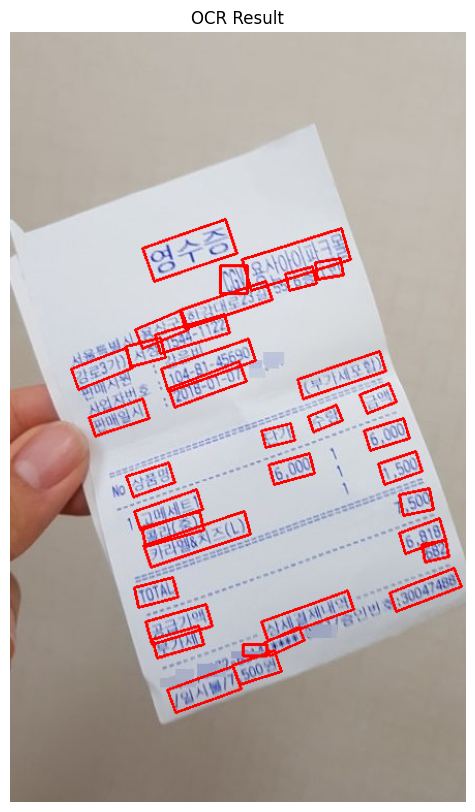

In [19]:
# 시각화된 결과를 파일로 저장
output_path = f'./ocr_result_{current_time}.jpg'
cv2.imwrite(output_path, cv2.cvtColor(image_with_boxes, cv2.COLOR_RGB2BGR))  # RGB -> BGR로 변환 후 저장
plt.figure(figsize=(10, 10))
plt.imshow(show_img)
plt.axis('off')
plt.title("OCR Result")
plt.show()

In [ ]:
os.environ["openai_api_key"] = ""

In [24]:
openai.__version__

'1.40.0'

In [28]:
from langchain_openai import ChatOpenAI

# 시스템 프롬프트 설정
system_prompt = """
당신은 영수증을 확인하는 사람입니다. 
영수증 이미지에서 [FORMAT] 형태로 작성해 주세요. 
만약 영수증 이미지에 나와있지 않다면 없음이라고 해주세요.

FORMAT: 
- 가게명: 
- 주소: 
- 결제 일자: 
- 상품 별 금액: 
- 총 결제 금액: 
"""

# ChatOpenAI 모델 초기화
llm = ChatOpenAI(
    temperature=0.1,  # 응답의 창의성 조정
    max_tokens=2048,  # 응답의 최대 길이
    model_name="gpt-4",  # 사용할 모델 이름
)

# 입력 텍스트 (OCR 결과)
ocr_result = """
상점명: A마트
주소: 서울시 강남구 테헤란로 123
결제 일자: 2024-11-18
상품: 사과 3000원, 바나나 2000원
총 결제 금액: 5000원
"""

# LLM 호출
response = llm([
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": ocr_result},
])

# 결과 출력
print(response["choices"][0]["message"]["content"].strip())


TypeError: 'AIMessage' object is not subscriptable

In [ ]:
system_prompt = """
당신은 영수증을 확인하는 사람입니다. 
영수증 이미지에서 [FORMAT] 형태로 작성해 주세요. 
만약 영수증 이미지에 나와있지 않다면 없음이라고 해주세요.

FORMAT: 
- 가게명: 
- 주소: 
- 결제 일자: 
- 상품 별 금액: 
- 총 결제 금액: 
"""

# ChatOpenAI 챗모델을 초기화합니다.
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    max_tokens=2048,  # 최대 토큰수
    model_name="gpt-4o",  # 모델명
)

# 멀티모달 객체 생성
multimodal_llm = MultiModal(
    llm, 
    system_prompt=system_prompt
)


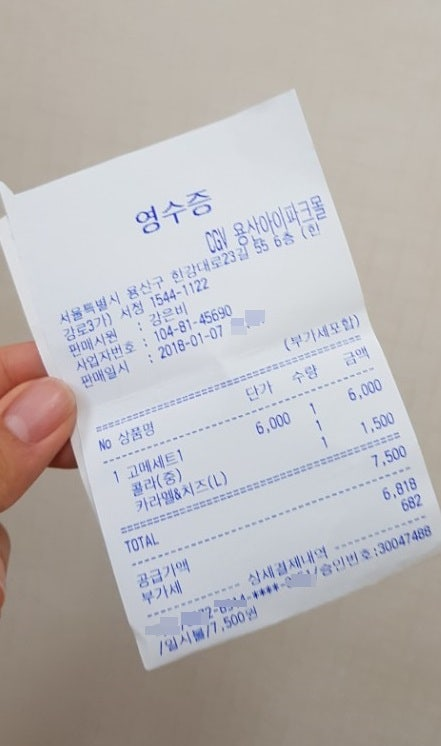

손에 들려 있는 영수증의 이미지입니다. 영수증 상단에는 "영수증"이라는 글자가 있고, 그 아래에 "CGV 용산아이파크몰"이라는 가게명이 적혀 있습니다. 주소는 서울특별시 용산구 한강대로23길 55 6층으로 나와 있습니다. 전화번호와 사업자 등록번호, 매장번호, 판매일자(2018-01-07) 등의 정보가 포함되어 있습니다. 

상품 내역으로는 "고메세트1"이 6,000원, "콜라(중)"이 1,500원, "카라멜팝콘(L)"이 7,500원으로 나와 있습니다. 총 결제 금액은 16,000원이며, 부가세는 682원입니다. 결제 방식은 신용카드로 되어 있습니다.

In [15]:
# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "파란영수증1.jpg"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm.stream(IMAGE_PATH_FROM_FILE)

# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)